Реализуем градиентный спуск для задачи поиска оптимальных коэффициентов в MSE регрессии!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Имеем 1000 объектов и 10 признаков у каждого (+таргет)!

Обучим модель линейной регрессии:

$$
a(x) = \beta_1 d_{1} + \beta_2 d_{2} + \beta_3 d_{3} + \beta_4 d_{4} + \beta_5 d_{5} + \beta_6 d_{6} + \beta_7 d_{7} + \beta_8 d_{8} + \beta_9 d_{9} + \beta_{10} d_{10} + \beta_0
$$

Которая минимизирует MSE:

$$
Q(a(X), Y) = \sum_i^{1000} (a(x_i) - y_i)^2
$$

In [2]:
data = pd.read_csv('data.csv')

data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.113768,0.930064,0.330528,0.010987,0.265703,0.699462,0.058465,0.431643,0.650958,0.751820,30.147094
1,0.380048,0.485946,0.870232,0.473401,0.454516,0.500864,0.471723,0.234329,0.072982,0.008372,21.424402
2,0.768462,0.217706,0.727438,0.718377,0.452155,0.434638,0.043989,0.972489,0.450133,0.378157,31.422056
3,0.606637,0.604335,0.540332,0.491236,0.325632,0.206348,0.825767,0.332475,0.955518,0.162811,31.308588
4,0.119770,0.469718,0.632829,0.504207,0.238259,0.452457,0.775360,0.174262,0.117621,0.218883,23.322751


Обучим коэффициенты линейной регрессии с помощью библиотеки <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html"> **sklearn** </a>

Отдельно выведем оценку свободного коэффициента  ($\beta_0$ при $d_0 = 1$)

In [3]:
Y = data['target']
X = data.drop(['target'], axis = 1)

In [4]:
Y

0      30.147094
1      21.424402
2      31.422056
3      31.308588
4      23.322751
         ...    
995    32.910569
996    27.457300
997    32.980881
998    34.254264
999    28.633255
Name: target, Length: 1000, dtype: float64

In [5]:
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.113768,0.930064,0.330528,0.010987,0.265703,0.699462,0.058465,0.431643,0.650958,0.751820
1,0.380048,0.485946,0.870232,0.473401,0.454516,0.500864,0.471723,0.234329,0.072982,0.008372
2,0.768462,0.217706,0.727438,0.718377,0.452155,0.434638,0.043989,0.972489,0.450133,0.378157
3,0.606637,0.604335,0.540332,0.491236,0.325632,0.206348,0.825767,0.332475,0.955518,0.162811
4,0.119770,0.469718,0.632829,0.504207,0.238259,0.452457,0.775360,0.174262,0.117621,0.218883
...,...,...,...,...,...,...,...,...,...,...
995,0.538751,0.072868,0.337400,0.531014,0.240128,0.652470,0.772777,0.062364,0.860766,0.594596
996,0.898252,0.169217,0.750159,0.155727,0.844080,0.403090,0.098818,0.360846,0.613283,0.323710
997,0.813122,0.251505,0.284456,0.314093,0.869697,0.995674,0.971214,0.324628,0.584621,0.020221
998,0.722563,0.533463,0.747446,0.973052,0.462915,0.959898,0.561589,0.059606,0.599894,0.407610


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

for column, coef in zip(X.columns, model.coef_.round(3)):
    print(column, coef)
    
print(model.intercept_.round(2))

feature_1 1.0
feature_2 2.0
feature_3 3.0
feature_4 4.0
feature_5 5.0
feature_6 6.0
feature_7 7.0
feature_8 8.0
feature_9 9.0
feature_10 10.0
4.37


Теперь вам необходимо реализовать класс для оптимизации коэффициентов линейной регрессии МНК.
Подразумевается, что на вход алгоритм будет принимать следующие параметры:

- 2 pandas датафрейма **samples** и **targets**, содержащих матрицу объектов и ветор ответов соответственно
- значение **learning rate**, который корректирует длину вектора-градиента (чтобы он не взорвался)
- значение **threshold**'а для критерия останова (когда мы считаем, что мы сошлись к оптимуму)
- параметр **copy**, который позволяет либо делать изменения in-place в датафрейме, подающимся в класс, если изменения матрицы объектов в принципе при обучении имеются. Или же копировать объект при инициализации класса и возвращать новый объект, если требуется.

Он будет состоять из следующих важных компонент-методов:

- **add_constant_feature**: добавляет колонку с названием *constant* из единичек к переданному датафрейму **samples**. Это позволяет оценить свободный коэффициент $\beta_0$.

- **calculate_mse_loss**: вычисляет при текущих весах **self.beta** значение среднеквадратической ошибки.

- **calculate_gradient**: вычисляет при текущих весах вектор-градиент по функционалу.

- **iteration**: производит итерацию градиентного спуска, то есть обновляет веса модели, в соответствии с установленным **learning_rate = $\eta$**: $\beta^{(n+1)} = \beta^{(n)} - \eta \cdot \nabla Q(\beta^{(n)})$

- **learn**: производит итерации обучения до того момента, пока не сработает критерий останова обучения. В этот раз критерием останова будет следующее событие: во время крайней итерации изменение в функционале качества модели составило значение меньшее, чем **self.threshold**. Иными словами, $|Q(\beta^{(n)}) - Q(\beta^{(n+1)})| < threshold$.

P.S. установите в **__init__** аттрибут экземпляра с названием **iteration_loss_dict**, который будет устроен следующим образом: на каждой итерации мы будем добавлять в словарь пару ключ-значение, где ключем будет номер итерации $n$, а значением - среднеквадратическая ошибка в точке $\beta^{(n)}$. Это пригодится нам в будущем для визуализации.

### Hint: пример вычисления производной

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + ... + \beta_n \cdot d_{in} - y_i)^2
$$

Выше - минимизируемая функция. Она зависит от n переменных: $\beta_1, ..., \beta_n$. Вектор-градиент - матрица с одной строчкой, состоящей из производных 1го порядка по всем переменным.

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; ... \;\;\; Q'_{\beta_{n-1}}  \;\;\;  Q'_{\beta_n})
$$

Пример вычисления производной по первой переменной:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} (\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i)
$$

Скажем, для нашего датасета X, Y вычислим эту саму производную при начальных единичных коэффициентах $\beta_{start} = (1 \;\;\; 1 \;\;\; ...)$

Получим для каждого объекта в начале выражение из скобочек: 
$$
\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i
$$

In [87]:
### Инициализируем точку для коэффициентов в виде вектора из единичек
initial_betas = np.ones(X.shape[1])

### Получим выражение выше для каждого объекта. 
### Для этого скалярно перемножим строчки из X на наши beta

scalar_value = np.dot(X, initial_betas.reshape(-1, 1)).ravel()
# scalar_value = (scalar_value - Y).values


Теперь полученное значение для каждого объекта умножим на соответствующее значение признака $d_1$:

$$
d_{i1} \cdot (\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i)
$$

In [85]:
### Возьмем столбик со значениями 1 признака

d_i1 = X.values[:, 0]

### Умножим каждый объект на соответствующее значение признака
scalar_value = scalar_value * d_i1

In [84]:
### Наконец, умножим все на 2 и усреднимся, 
### чтобы получить значение производной по первому параметру

2 * np.mean(scalar_value)

-27.62384887912409

### Эта логика поможем Вам при реализации класса!

In [6]:
class GradientDescentMse:
    """
    Базовый класс для реализации градиентного спуска в задаче линейной МНК регрессии 
    """

    def __init__(self, samples: pd.DataFrame, targets: pd.DataFrame,
                 learning_rate: float = 1e-3, threshold = 1e-6, copy: bool = True):
        """
        :param samples: матрица объектов
        :param targets: вектор (матрица с 1 столбцом) ответов
        :param learning_rate: параметр learning_rate для корректировки нормы градиента
        :param threshold: величина, меньше которой изменение в loss-функции означает 
        :param copy: копировать сэмплы или делать изменения in-place (см. add_constant_feature)
        """
        self.samples = samples
        self.targets = targets
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.copy = copy
        self.iteration_loss_dict = dict()
        self.beta = np.ones(self.samples.shape[1] + self.copy)
        
    def add_constant_feature(self):
        
        """
        Метод для создания константной фичи в матрице объектов samples
        """
        Z = np.ones((X.shape[0],1))
        self.samples = np.concatenate((self.samples, Z), axis=1)
        
        
    def calculate_mse_loss(self) -> float:
        """
        Метод для расчета среднеквадратической ошибки
        
        :return: среднеквадратическая ошибка при текущих весах модели : float
        """
        error = ((np.dot(self.samples,self.beta)- self.targets)**2).mean()
        return error

    def calculate_gradient(self) -> np.ndarray:
        """
        Метод для вычисления вектора-градиента
        
        :return: вектор-градиент, т.е. массив, содержащий соответствующее количество производных по каждой переменной : np.ndarray
        """
        scalar_value = np.dot(self.samples, self.beta.reshape(-1, 1)).ravel()
        scalar_value = (scalar_value - self.targets).values
        return (2 / self.samples.shape[0]) * np.dot(scalar_value, self.samples)
    
    
    def iteration(self):
        """
        Обновляем веса модели в соответствии с текущим вектором-градиентом
        """
        
        return self.beta - self.calculate_gradient() * self.learning_rate
        
        
    def learn(self):
        """
        Итеративное обучение весов модели до срабатывания критерия останова
        """
        i = 1
        while True:
            self.iteration_loss_dict[i] = self.calculate_mse_loss()
            self.beta = self.iteration()
            if i > 2 and abs(self.iteration_loss_dict[i]-self.iteration_loss_dict[i-1]) < self.threshold:
                break
            i = i + 1



Обучим коэффициенты линейной модели с помощью реализованного нами градиентного спуска, не забыв добавить свободную переменную. Получились ли такие же коэффициенты, как и при использовании **LinearRegression** из **sklearn**? Если нет, то почему они отличаются, на Ваш взгляд, и сильно ли?

In [32]:
GD = GradientDescentMse(samples=X, targets=Y)
GD.add_constant_feature()
GD.learn()

In [9]:
print('Веса модели при переменных d0, d1, ..., d10 равны соответственно: \n\n' + str(GD.beta))

Веса модели при переменных d0, d1, ..., d10 равны соответственно: 

[0.88733759 1.90101162 2.88064131 3.87663169 4.89623985 5.89126704
 6.89255341 7.90312433 8.87580717 9.86110255 4.94852056]


Попробуйте теперь изменить значения **learning_rate** и/или **threshold**. Например, установите длину шага $\eta = 1$. Что произошло и почему такое возможно?

In [ ]:
#запустил бесконечный цикл

В машинном обучении зачастую исследуют так называемые **траектории обучения** (или **learning paths**). Это графики, показывающие, как во время обучения при каждой следующей итерации изменялось значение минимизируемого функционала. Постройте такие траектории для различных **learning rate**'ов и **threshold**'ов. Советуем использовать для этого разобранный на занятиях **add_subplot** метод. 

Возьмите следующие **threshold**'ы: 1e-2, 1e-3, 1e-4, 1e-5

И следующие значения **learning rate**'а: 1e-1, 5e-2, 1e-2, 5e-3, 1e-3

У вас должен получиться примерно такой график (см. ниже, значения среднеквадратической ошибки мы намеренно замазали оранжевыми квадратиками, чтобы не спойлерить вам результаты).

Как и подобает хорошим Data Scientist'ам, не забывайте подписывать графики, оси, а так же делать элементы ваших визуализаций читаемыми и видимыми. Советуем пересмотреть методы и параметры форматирования из лекции.

При какой комбинации **threshold** - **learning rate** из возможных предложенных выше, получается достигнуть меньшего значения нашей минимизируемой функции? Запишите каждой из значений в легенде на графиках.


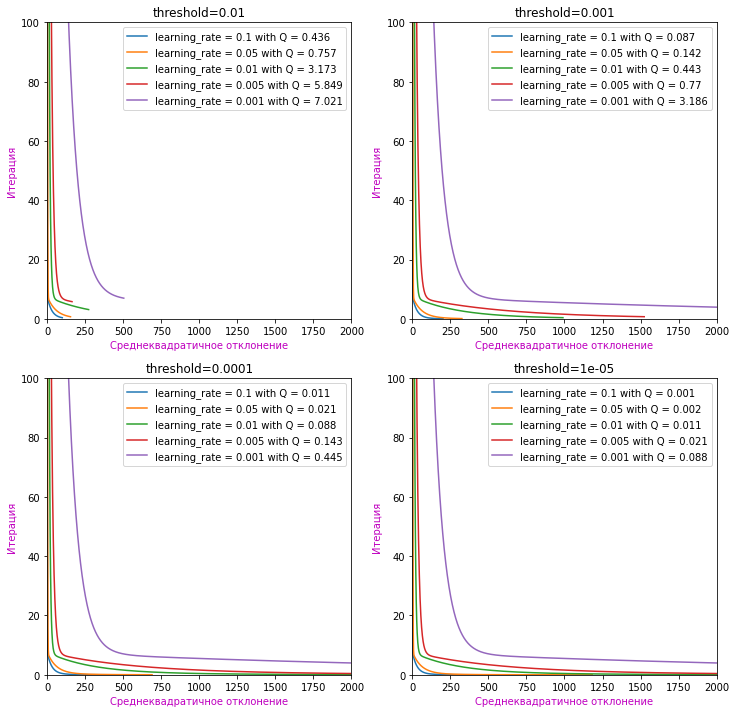

In [43]:
threshold_dict = (1e-2, 1e-3, 1e-4, 1e-5)
learning_rate_dict = (1e-1, 5e-2, 1e-2, 5e-3, 1e-3)

fig = plt.figure() 
fig.set_size_inches(12, 12)
for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plt.xlabel("Среднеквадратичное отклонение", fontsize = 10, color = "m")
    plt.ylabel("Итерация", fontsize = 10, color = "m")
    plt.title(f'threshold={threshold_dict[i]}')
    legends = []
    for r in learning_rate_dict:
        GD = GradientDescentMse(samples=X, targets=Y, learning_rate = r, threshold=threshold_dict[i])
        GD.add_constant_feature()
        GD.learn()
        legends.append(f'learning_rate = {r} with Q = {round(list(GD.iteration_loss_dict.values())[-1], 3)}')
        x = list(GD.iteration_loss_dict.keys())
        y = list(GD.iteration_loss_dict.values())
        plt.plot(x, y)
        plt.legend(legends)
    plt.xlim(0, 2000)
    plt.ylim(0, 100)
        

        